In [22]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot
import pandas as pd
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import pandas_datareader as pdr

In [2]:
df=pd.read_csv("history.csv")

In [3]:
df=df.reset_index()
df.rename(columns={'Date': 'ds', 'Units': 'y'}, inplace=True)

In [4]:
df

,index,ds,y
0,0,2010-06-29,1
1,1,2010-06-30,1
2,2,2010-07-01,1
3,3,2010-07-02,1
4,4,2010-07-06,1
...,...,...,...
3255,3255,2023-06-05,217
3256,3256,2023-06-06,221
3257,3257,2023-06-07,224
3258,3258,2023-06-08,234


In [5]:
df.isna().sum()

index    0
ds       0
y        0
dtype: int64

In [6]:
df.describe()

,index,y
count,3260.000000,3260.000000
mean,1629.500000,62.330675
std,941.225265,96.480399
min,0.000000,1.000000
25%,814.750000,9.000000
50%,1629.500000,16.000000
75%,2444.250000,46.250000
max,3259.000000,409.000000


In [7]:
df.describe

<bound method NDFrame.describe of       index          ds    y
0         0  2010-06-29    1
1         1  2010-06-30    1
2         2  2010-07-01    1
3         3  2010-07-02    1
4         4  2010-07-06    1
...     ...         ...  ...
3255   3255  2023-06-05  217
3256   3256  2023-06-06  221
3257   3257  2023-06-07  224
3258   3258  2023-06-08  234
3259   3259  2023-06-09  244

[3260 rows x 3 columns]>

In [8]:
df.shape

(3260, 3)

In [9]:
df=df.dropna()

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
mean_imputer.fit_transform((df['y'].values).reshape(-1,1))

array([[  1.],
       [  1.],
       [  1.],
       ...,
       [224.],
       [234.],
       [244.]])

<Axes: xlabel='y'>

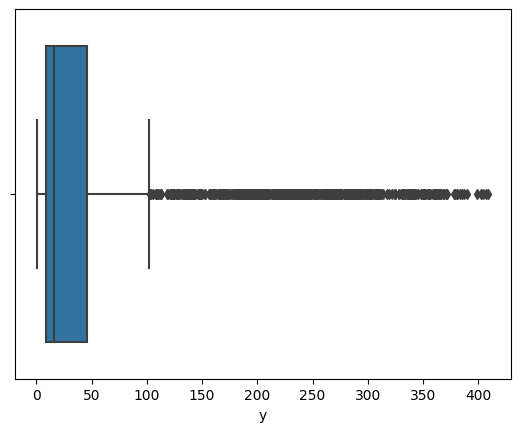

In [11]:
import seaborn as sns
sns.boxplot(x=df['y'])

In [12]:
# q1 = df.quantile(0.25)
# q3 = df.quantile(0.75)
# iqr = q3-q1
# print((df['y']<(q1-1.5*iqr)) | (df['y']>(q3+1.5*iqr)))

In [13]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55eyubth/p2zfsb7x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp55eyubth/q5mxvm4z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67439', 'data', 'file=/tmp/tmp55eyubth/p2zfsb7x.json', 'init=/tmp/tmp55eyubth/q5mxvm4z.json', 'output', 'file=/tmp/tmp55eyubth/prophet_modeln60ppfd7/prophet_model-20230611005139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:51:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [15]:
future_dates=model.make_future_dataframe(periods=30)

In [16]:
future_dates.tail()

,ds
3285,2023-07-05
3286,2023-07-06
3287,2023-07-07
3288,2023-07-08
3289,2023-07-09


In [17]:
prediction = model.predict(future_dates)

In [18]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3285,2023-07-05,240.348002,197.130221,272.603428,240.348002,240.348002,-3.702349,-3.702349,-3.702349,-0.554069,-0.554069,-0.554069,-3.148280,-3.148280,-3.148280,0.0,0.0,0.0,236.645653
3286,2023-07-06,240.360693,194.609673,275.364382,240.360693,240.360693,-3.659336,-3.659336,-3.659336,-0.703889,-0.703889,-0.703889,-2.955447,-2.955447,-2.955447,0.0,0.0,0.0,236.701357
3287,2023-07-07,240.373383,197.327656,272.609202,240.373383,240.373383,-3.610506,-3.610506,-3.610506,-0.839193,-0.839193,-0.839193,-2.771313,-2.771313,-2.771313,0.0,0.0,0.0,236.762877
3288,2023-07-08,240.386073,200.581369,276.334483,240.386073,240.386073,-1.215302,-1.215302,-1.215302,1.383084,1.383084,1.383084,-2.598386,-2.598386,-2.598386,0.0,0.0,0.0,239.170771
3289,2023-07-09,240.398764,201.346801,278.810160,240.398764,240.398764,-1.055605,-1.055605,-1.055605,1.383082,1.383082,1.383082,-2.438686,-2.438686,-2.438686,0.0,0.0,0.0,239.343159


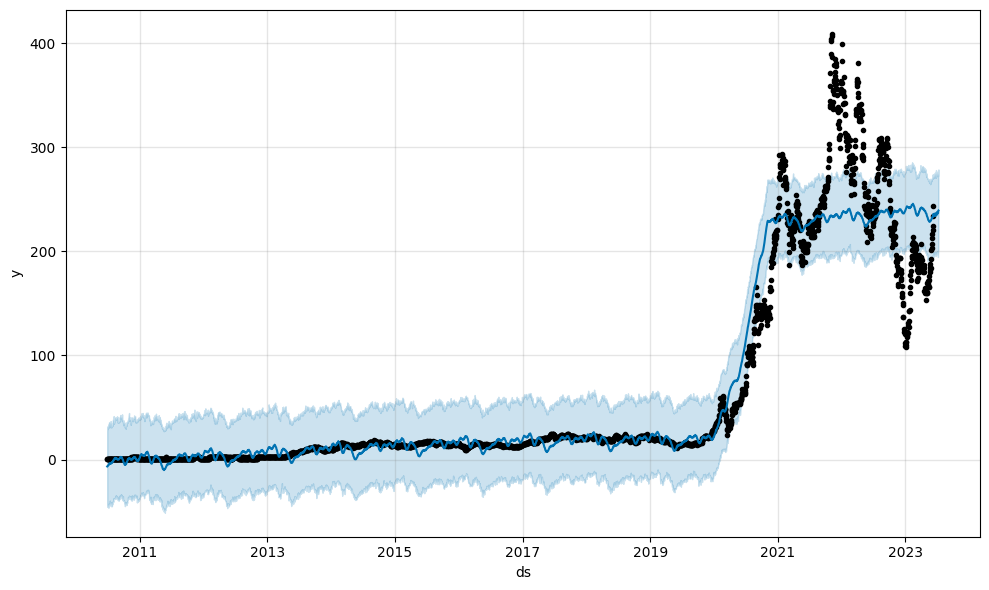

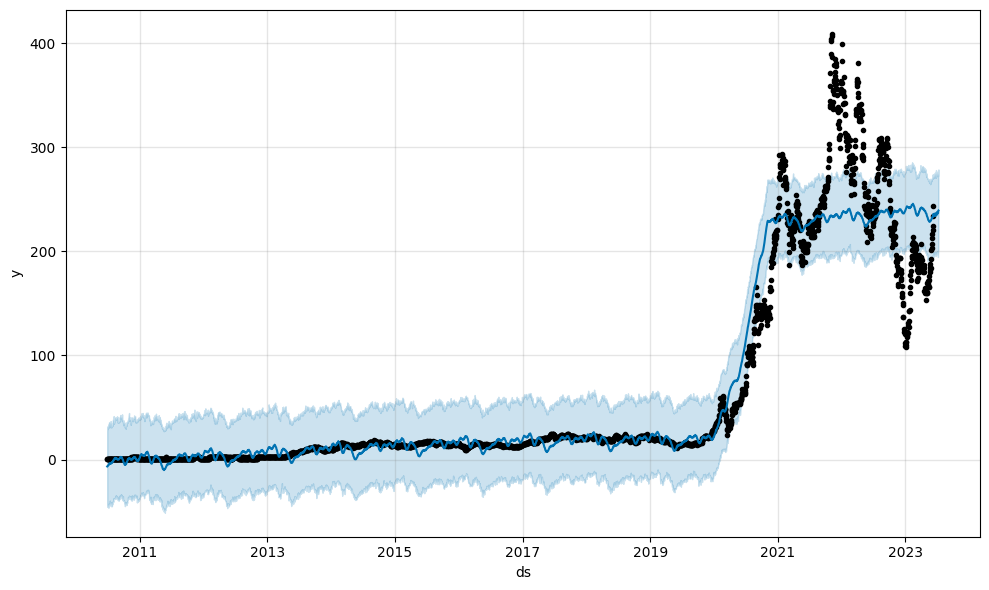

In [19]:
model.plot(prediction)

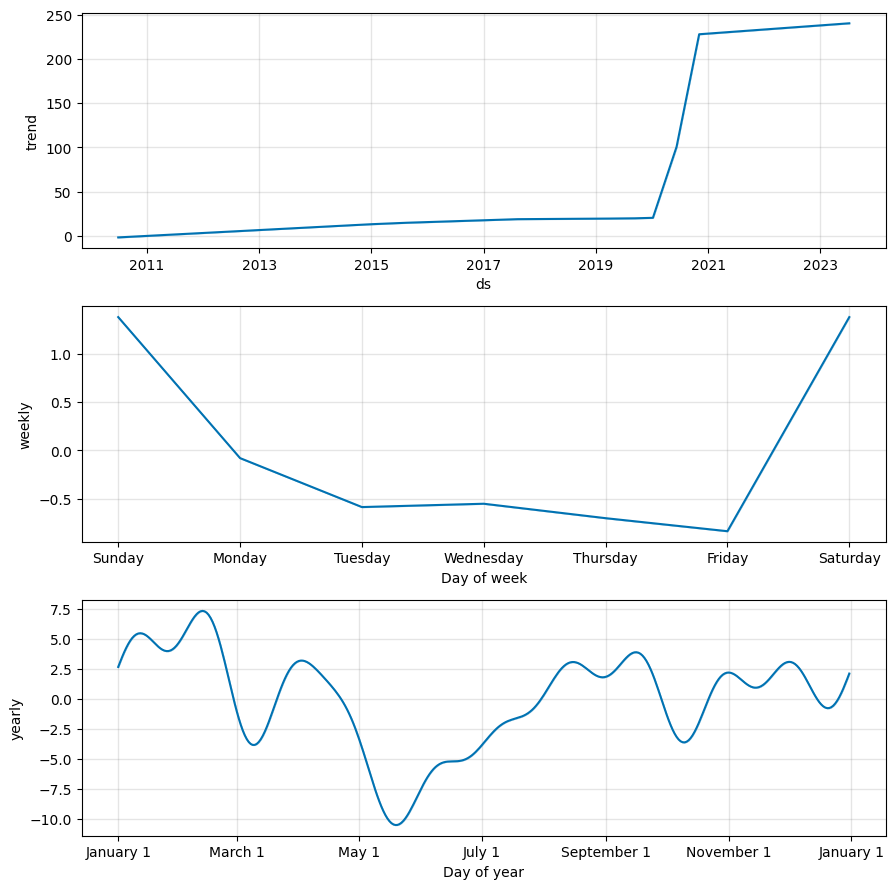

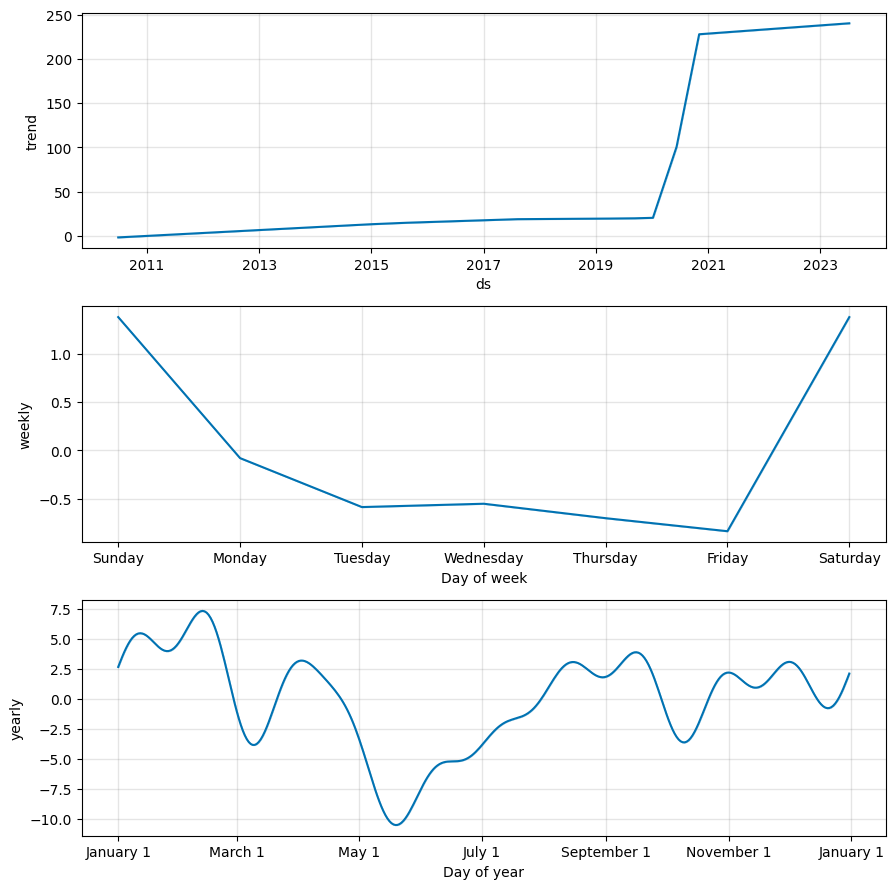

In [20]:
model.plot_components(prediction)

In [21]:
df.head()

,index,ds,y
0,0,2010-06-29,1
1,1,2010-06-30,1
2,2,2010-07-01,1
3,3,2010-07-02,1
4,4,2010-07-06,1


In [41]:
import pickle

In [42]:
pickle_out = open("classifier.pkl",mode="wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [43]:
!pip install streamlit -q

In [44]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
%%writefile app.py

import pickle
import streamlit as st
from PIL import Image
import streamlit as st
st.write('Hello world from Team RaktConnect, This is our CFG project - `RaktConnect`')
#st.write('## Predciting Blood needs with `RaktConnect`')
st.write('## Time Series Analysis !! No problem `RaktConnect` is with you ')
st.write('our website `https://team-6.herokuapp.com/`')

#loading the trained model
pickle_in = open('classifier.pkl','rb')
classifier = pickle.load(pickle_in)

@st.cache



def main():
      #giving a title for our website
      st.title('RaktConnect - Predciting Future Is No More Magic')
      image = Image.open('img2.png')
      st.image(image, caption='Trends Analysis')
      image2 = Image.open('img1.png')
      st.image(image2, caption='Preictions')


if __name__ == '__main__':
    main()
    


Overwriting app.py


In [46]:
from pyngrok import ngrok

In [93]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=88bc9c7899e53f0bf84e6eead24ac05fef15ac3acc6010d03d11d3fb011c0e81
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 6.0.0
    Uninstalling pyngrok-6.0.0:
      Successfully uninstalled pyngrok-6.0.0


In [47]:
ngrok.set_auth_token("***********************************")

In [48]:
!nohup streamlit ruk app.py --server.port 80 &
url = ngrok.connect(port = '80')
print(url)

nohup: appending output to 'nohup.out'


http://ac9c-34-74-151-224.ngrok-free.app


In [ ]:
!streamlit run --server.port 80 app.py >/dev/null